In [ ]:

!pip install --upgrade opencv-python==4.9.0.80

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras



## Seeding
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [ ]:
image_size = 256
train_path = "/content/drive/MyDrive/"
epochs = 700
batch_size = 8

In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras

class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size, image_size=128):
        self.batch_size = batch_size
        self.image_size = image_size
        self.ids = ids
        self.mask_ids = ids
        self.path = path
        self.on_epoch_end()

    def __load__(self, id_name, mask_id_name):
        image_path = os.path.join(self.path, "IMAGES_12/", id_name) + ".jpg"
        mask_path = os.path.join(self.path, "MASKS_12/", mask_id_name) + ".jpg"

        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))

        mask = cv2.imread(mask_path, 1)
        mask = cv2.resize(mask, (self.image_size, self.image_size))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = np.expand_dims(mask, axis=-1)

        image = image / 255.0
        mask = mask / 255.0

        return image, mask

    def __getitem__(self, index):
        if (index + 1) * self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index * self.batch_size

        files_batch = self.ids[index * self.batch_size: (index + 1) * self.batch_size]
        mask_files_batch = self.mask_ids[index * self.batch_size: (index + 1) * self.batch_size]

        image = []
        mask = []

        for id_name, mask_id_name in zip(files_batch, mask_files_batch):
            _img, _mask = self.__load__(id_name, mask_id_name)
            image.append(_img)
            mask.append(_mask)

        image = np.array(image)
        mask = np.array(mask)

        return image, mask

    def on_epoch_end(self):
        pass

    def __len__(self):
        return int(np.ceil(len(self.ids) / float(self.batch_size)))


class TestGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size, image_size=128):
        self.batch_size = 8
        self.image_size = image_size
        self.ids = ids
        self.path = path

    def __load__(self, id_name):
        image_path = os.path.join(self.path, "IMAGES_12/", id_name) + ".jpg"
        mask_path = os.path.join(self.path, "MASKS_12/", id_name) + ".jpg"

        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        image = image / 255.0

        mask = cv2.imread(mask_path, 1)
        mask = cv2.resize(mask, (self.image_size, self.image_size))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = np.expand_dims(mask, axis=-1)
        mask = mask / 255.0

        return image, mask

    def __getitem__(self, index):
        if (index + 1) * self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index * self.batch_size

        files_batch = self.ids[index * self.batch_size: (index + 1) * self.batch_size]

        image = []
        mask = []

        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)

        image = np.array(image)
        mask = np.array(mask)

        return image, mask

    def __len__(self):
        return int(np.ceil(len(self.ids) / float(self.batch_size)))







In [ ]:
train_ids = ['image_{:03d}_{:d}'.format(i, j) for i in range(1, 41) for j in range(5)]  # 80% for training (192 images)
test_ids = ['image_{:03d}_{:d}'.format(i, j) for i in range(41, 45) for j in range(5)]  # 10% for testing (24 images)
valid_ids = ['image_{:03d}_{:d}'.format(i, j) for i in range(45, 49) for j in range(5)]  # 10% for validation (24 images)






In [ ]:

for i in range(len(valid_ids)):
    print(valid_ids[i], train_ids[i], test_ids[i])

image_045_0 image_001_0 image_041_0
image_045_1 image_001_1 image_041_1
image_045_2 image_001_2 image_041_2
image_045_3 image_001_3 image_041_3
image_045_4 image_001_4 image_041_4
image_046_0 image_002_0 image_042_0
image_046_1 image_002_1 image_042_1
image_046_2 image_002_2 image_042_2
image_046_3 image_002_3 image_042_3
image_046_4 image_002_4 image_042_4
image_047_0 image_003_0 image_043_0
image_047_1 image_003_1 image_043_1
image_047_2 image_003_2 image_043_2
image_047_3 image_003_3 image_043_3
image_047_4 image_003_4 image_043_4
image_048_0 image_004_0 image_044_0
image_048_1 image_004_1 image_044_1
image_048_2 image_004_2 image_044_2
image_048_3 image_004_3 image_044_3
image_048_4 image_004_4 image_044_4


In [ ]:
gen = DataGen(train_ids, train_path, batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(8, 256, 256, 3) (8, 256, 256, 1)


In [ ]:
test_gen = TestGen(test_ids, train_path, batch_size, image_size=image_size)
X,Y = test_gen.__getitem__(0)
print(X.shape, Y.shape)

(8, 256, 256, 3) (8, 256, 256, 1)


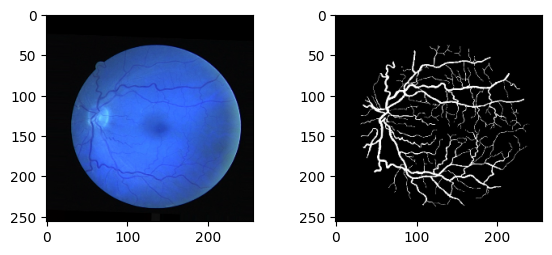

In [ ]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(x, num_filters, kernel_size, padding="same", act=True):
    x = tf.keras.layers.Conv2D(num_filters, kernel_size, padding=padding, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    if act:
        x = tf.keras.layers.Activation("relu")(x)
    return x

def multires_block(x, num_filters, alpha=1.67):
    W = num_filters * alpha

    x0 = x
    x1 = conv_block(x0, int(W*0.167), 3)
    x2 = conv_block(x1, int(W*0.333), 3)
    x3 = conv_block(x2, int(W*0.5), 3)
    xc = tf.keras.layers.Concatenate()([x1, x2, x3])
    xc = tf.keras.layers.BatchNormalization()(xc)

    nf = int(W*0.167) + int(W*0.333) + int(W*0.5)
    sc = conv_block(x0, nf, 1, act=False)

    x = tf.keras.layers.Activation("relu")(xc + sc)
    x = tf.keras.layers.BatchNormalization()(x)
    return x


In [ ]:
def res_path(x, num_filters, length):
    for i in range(length):
        x0 = x
        x1 = conv_block(x0, num_filters, 3, act=False)
        sc = conv_block(x0, num_filters, 1, act=False)
        x = tf.keras.layers.Activation("relu")(x1 + sc)
        x = tf.keras.layers.BatchNormalization()(x)
    return x

def encoder_block(x, num_filters, length):
    x = multires_block(x, num_filters)
    s = res_path(x, num_filters, length)
    p = tf.keras.layers.MaxPooling2D((2, 2))(x)
    return s, p

def decoder_block(x, skip, num_filters):
    x = tf.keras.layers.Conv2DTranspose(num_filters, 2, strides=2, padding="same")(x)
    x = tf.keras.layers.Concatenate()([x, skip])
    x = multires_block(x, num_filters)
    return x

def build_multiresunet(shape):
    """ Input """
    inputs = tf.keras.layers.Input(shape)

    """ Encoder """
    p0 = inputs
    s1, p1 = encoder_block(p0, 32, 4)
    s2, p2 = encoder_block(p1, 64, 3)
    s3, p3 = encoder_block(p2, 128, 2)
    s4, p4 = encoder_block(p3, 256, 1)

    """ Bridge """
    b1 = multires_block(p4, 512)

    """ Decoder """
    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    """ Output """
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    """ Model """
    model = tf.keras.models.Model(inputs, outputs, name="MultiResUNET")

    return model

In [ ]:

smooth = 1.
import tensorflow as tf
from keras import backend as K
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)


In [ ]:

shape = (256, 256, 3)
adam = keras.optimizers.Adam()
model = build_multiresunet(shape)
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=[dice_coef])
model.summary()

Model: "MultiResUNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 8)          216       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 8)          32        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 8)          0         ['batch_normalizati

In [ ]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)
test_gen = TestGen(test_ids, train_path, image_size=image_size, batch_size=8)
# Determine the number of steps per epoch
train_steps = len(train_ids) // batch_size
valid_steps = len(valid_ids) // batch_size
test_steps = len(test_ids) // batch_size

# If the length of the data is not evenly divisible by the batch size, add 1 additional step
if len(train_ids) % batch_size != 0:
    train_steps += 1
if len(valid_ids) % batch_size != 0:
    valid_steps += 1
if len(test_ids) % batch_size != 0:
    test_steps += 1

epochs = 700

history = model.fit(train_gen, validation_data=valid_gen, validation_steps=valid_steps,
                              epochs=epochs, steps_per_epoch=train_steps, verbose=1)

# Evaluate the model on the test data
test_results = model.evaluate(test_gen, steps=test_steps)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

Epoch 1/700
25/25 [==============================] - 163s 4s/step - loss: 0.7227 - dice_coef: 0.2773 - val_loss: 0.8758 - val_dice_coef: 0.1255
Epoch 2/700
25/25 [==============================] - 12s 476ms/step - loss: 0.5744 - dice_coef: 0.4256 - val_loss: 0.8994 - val_dice_coef: 0.1006
Epoch 3/700
25/25 [==============================] - 12s 480ms/step - loss: 0.4751 - dice_coef: 0.5249 - val_loss: 0.9249 - val_dice_coef: 0.0751
Epoch 4/700
25/25 [==============================] - 12s 485ms/step - loss: 0.3940 - dice_coef: 0.6060 - val_loss: 0.9313 - val_dice_coef: 0.0687
Epoch 5/700
25/25 [==============================] - 12s 464ms/step - loss: 0.3392 - dice_coef: 0.6608 - val_loss: 0.9519 - val_dice_coef: 0.0481
Epoch 6/700
25/25 [==============================] - 12s 473ms/step - loss: 0.3021 - dice_coef: 0.6979 - val_loss: 0.9831 - val_dice_coef: 0.0169
Epoch 7/700
25/25 [==============================] - 12s 472ms/step - loss: 0.2777 - dice_coef: 0.7223 - val_loss: 0.7969 - va

In [ ]:
model.save_weights("/content/drive/MyDrive/MulTiresunet.h5")

In [ ]:
HISTORY =  history

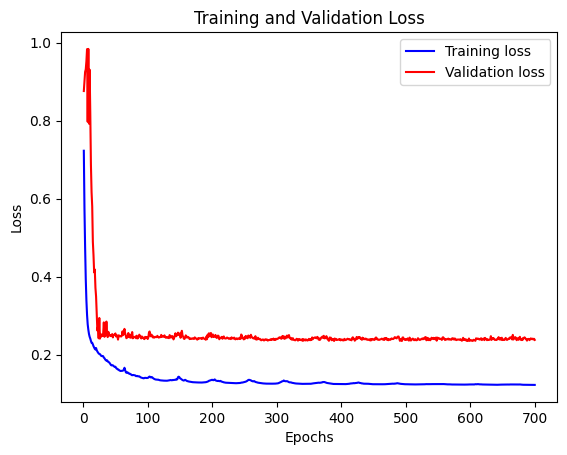

In [ ]:
# Extracting training and validation loss from the history object
train_loss = HISTORY.history['loss']
val_loss = HISTORY.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X.shape

(8, 256, 256, 3)

In [ ]:
Y.shape

(8, 256, 256, 1)


      Ground Truth            Predicted Value
1/1 [==============================] - 0s 29ms/step


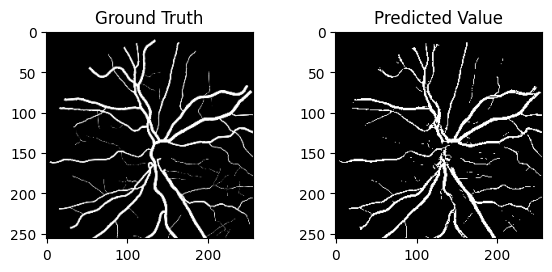

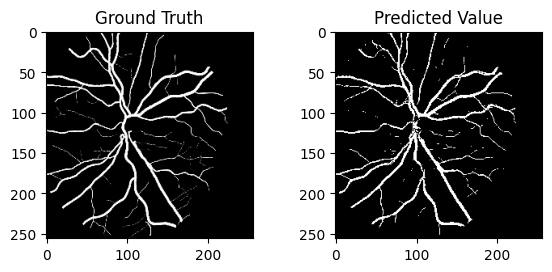

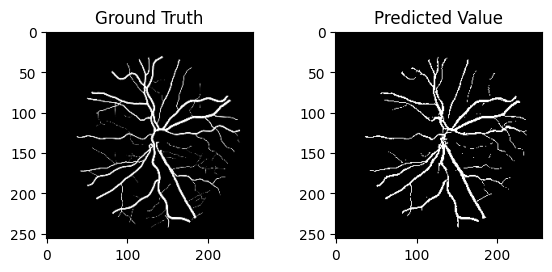

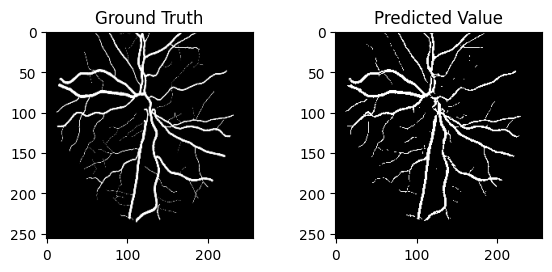

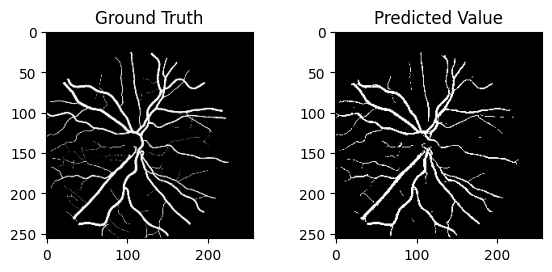

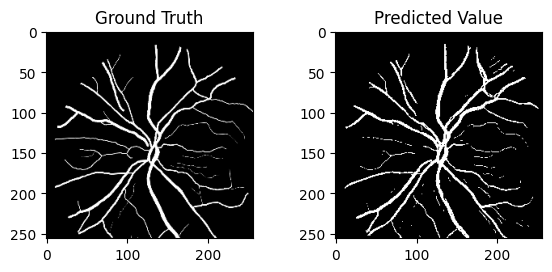

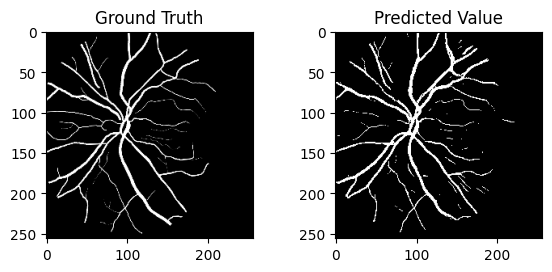

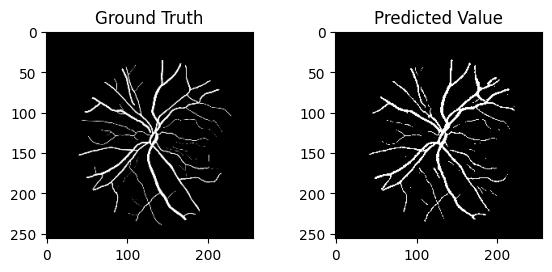

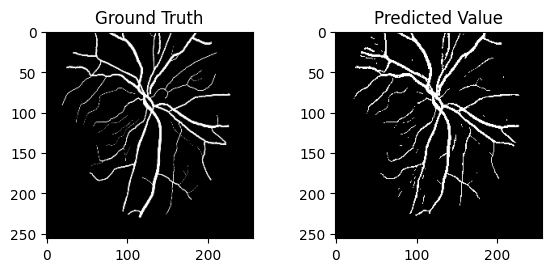

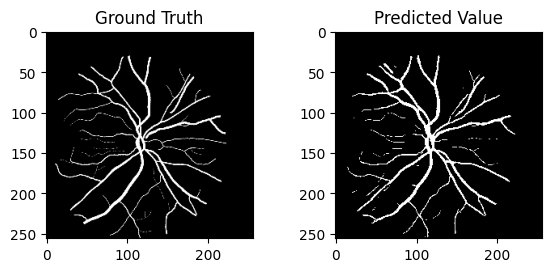

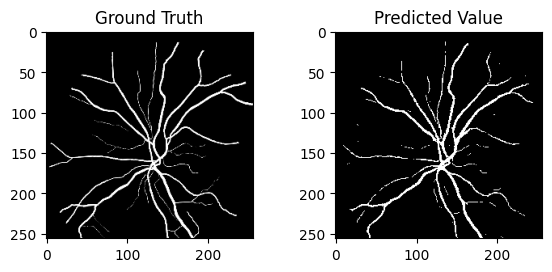

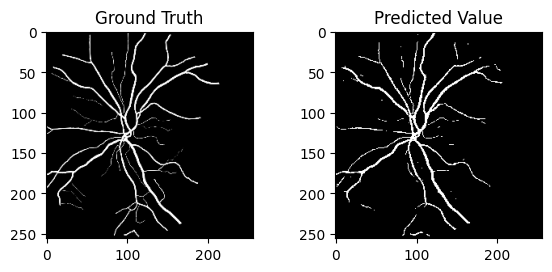

In [ ]:
print("\n      Ground Truth            Predicted Value")

for i in range(test_steps):
    # Dataset for prediction
    x, y = test_gen.__getitem__(i)

    # Predict segmentation masks using the trained model
    result = model.predict(x)
    result = result > 0.2

    for i in range(len(result)):
        fig = plt.figure()
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(np.reshape(y[i]*255, (image_size, image_size)), cmap="gray")
        ax.set_title("Ground Truth")

        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(np.reshape(result[i]*255, (image_size, image_size)), cmap="gray")
        ax.set_title("Predicted Value")



      Ground Truth            Predicted Value
1/1 [==============================] - 0s 39ms/step


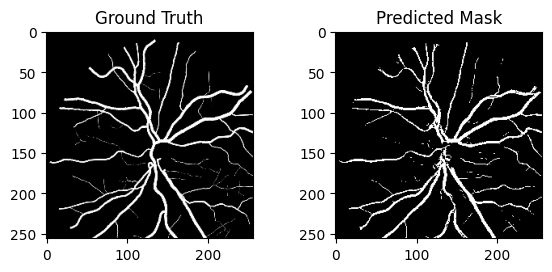

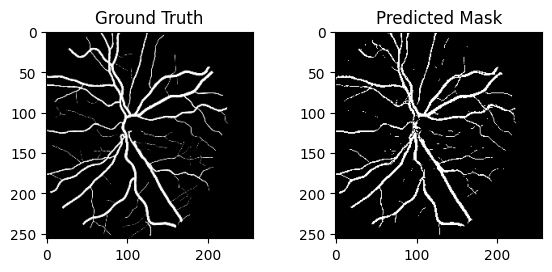

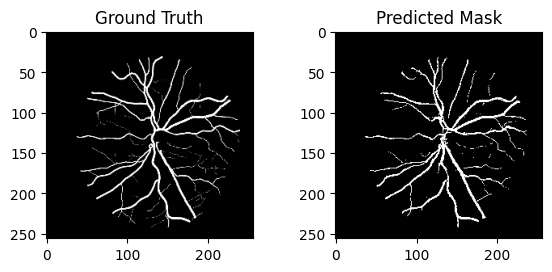

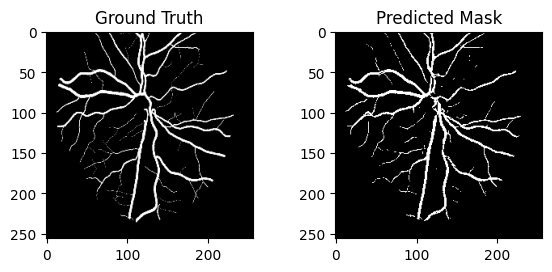

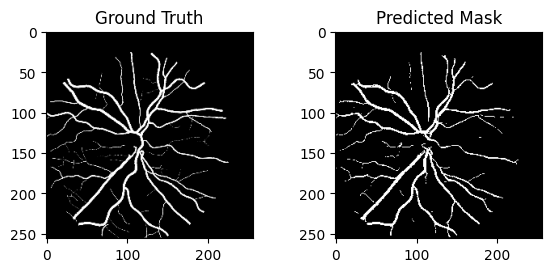

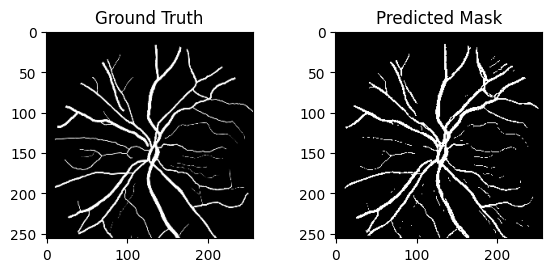

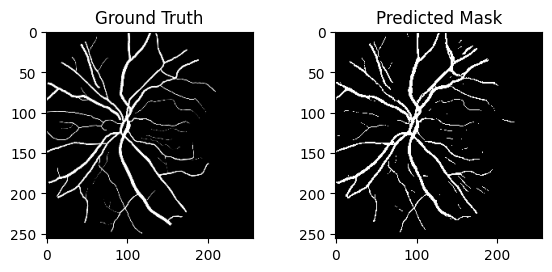

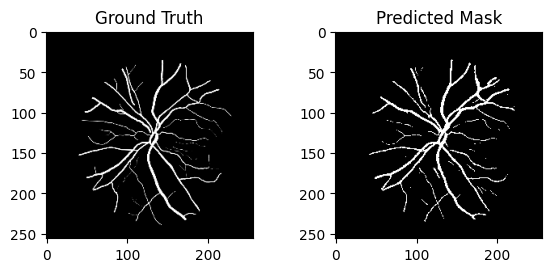

In [ ]:
print("\n      Ground Truth            Predicted Value")

for i in range(len(X)):
    # Dataset for prediction
    x = X[i]
    y = Y[i]

    # Reshape the input image for prediction
    x = np.expand_dims(x, axis=0)

    # Predict segmentation mask using the trained model
    result = model.predict(x)
    result = result > 0.2

    # Plot the ground truth and predicted masks
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.reshape(y*255, (image_size, image_size)), cmap="gray")
    ax.set_title("Ground Truth")

    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.reshape(result*255, (image_size, image_size)), cmap="gray")
    ax.set_title("Predicted Mask")


In [ ]:
test_gen = TestGen(test_ids, train_path, image_size=image_size, batch_size=8)

In [ ]:
!pip install scikit-image

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

def calculate_ssim(y_true, y_pred):
    y_true = y_true.astype(np.float64)
    y_pred = y_pred.astype(np.float64)

    ssim = compare_ssim(y_true, y_pred, data_range=y_pred.max() - y_pred.min(), multichannel=True)

    return ssim

# Calculate SSIM
ssim_score = calculate_ssim(Y[0], result[0])  # Assuming y and result are arrays of images
print("SSIM Score:", ssim_score)

SSIM Score: 0.42862359039800213


<ipython-input-27-621155a24c7a>:7: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = compare_ssim(y_true, y_pred, data_range=y_pred.max() - y_pred.min(), multichannel=True)


In [ ]:
# Initialize variables to store total dice coefficient and number of batches
total_dice_coef = 0.0
num_batches = 0

# Iterate over each batch in the test generator
for batch_index in range(test_steps):
    # Get the batch of test data
    x_test, y_test = test_gen.__getitem__(batch_index)

    # Predict segmentation masks using the trained model
    pred_masks = model.predict(x_test)

    # Calculate the Dice coefficient for the current batch
    batch_dice_coef = dice_coef(tf.cast(y_test, tf.float32), tf.cast(pred_masks, tf.float32)).numpy()

    # Accumulate the total Dice coefficient and increment the batch count
    total_dice_coef += batch_dice_coef
    num_batches += 1

# Calculate the average Dice coefficient across all batches
average_dice_coef = total_dice_coef / num_batches

# Print the average Dice coefficient (which serves as the accuracy)
print("Average Dice Coefficient (Test Accuracy):", average_dice_coef)

1/1 [==============================] - 0s 28ms/step
Average Dice Coefficient (Test Accuracy): 0.7582523624102274


In [ ]:
def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / (union + 1e-6)  # Add a small epsilon to avoid division by zero
    return iou

# Initialize variables to store total IoU and count of images
total_iou = 0
image_count = 0

# Iterate over test images
for i in range(test_steps):
    # Dataset for prediction
    x, y_true = test_gen.__getitem__(i)

    # Predict segmentation masks using the trained model
    y_pred = model.predict(x) > 0.2

    # Calculate IoU for each image
    for j in range(len(y_true)):
        single_iou = calculate_iou(y_true[j], y_pred[j])
        print(f"IoU for image {image_count + 1}: {single_iou}")
        total_iou += single_iou
        image_count += 1

# Calculate mean IoU
mean_iou = total_iou / image_count
print(f"Mean IoU for {image_count} images: {mean_iou}")


1/1 [==============================] - 0s 25ms/step
IoU for image 1: 0.4129824042279327
IoU for image 2: 0.40070019092928866
IoU for image 3: 0.3827938300692164
IoU for image 4: 0.39664555264549506
1/1 [==============================] - 0s 27ms/step
IoU for image 5: 0.3873041028009065
IoU for image 6: 0.44489471589631346
IoU for image 7: 0.4306043411302707
IoU for image 8: 0.41777055730845153
1/1 [==============================] - 0s 26ms/step
IoU for image 9: 0.4205347380558061
IoU for image 10: 0.42494226323677653
IoU for image 11: 0.36256455223983586
IoU for image 12: 0.36093716256090075
Mean IoU for 12 images: 0.40355620092509953


In [ ]:
import numpy as np

def calculate_miss_rate(y_true, y_pred):
    # Flatten the ground truth and predicted masks
    y_true_f = y_true.flatten()

    # Threshold y_pred to obtain binary masks
    y_pred_binary = (y_pred > 0.5).astype(np.int32)
    y_pred_f = y_pred_binary.flatten()

    # True negatives (TN): Ground truth negative and prediction negative
    true_negatives = np.sum((1 - y_true_f) * (1 - y_pred_f))

    # False negatives (FN): Ground truth positive and prediction negative
    false_negatives = np.sum(y_true_f * (1 - y_pred_f))

    # Miss rate = FN / (FN + TN)
    miss_rate = false_negatives / (false_negatives + true_negatives + np.finfo(float).eps)

    return miss_rate

def calculate_specificity(y_true, y_pred):
    # Convert predictions to binary values
    y_pred_binary = (y_pred > 0.5).astype(np.int32)

    # True negatives: actual negatives correctly identified
    tn = np.sum((y_true == 0) & (y_pred_binary == 0))

    # False positives: actual negatives incorrectly identified as positives
    fp = np.sum((y_true == 0) & (y_pred_binary == 1))

    # Specificity = TN / (TN + FP)
    specificity = tn / (tn + fp + np.finfo(float).eps)

    return specificity

def calculate_npv(y_true, y_pred):
    # Convert predicted values to binary (0 or 1)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate true negatives (TN), false negatives (FN)
    # true positives (TP), false positives (FP)
    TN = np.sum((1 - y_true) * (1 - y_pred_binary))
    FN = np.sum(y_true * (1 - y_pred_binary))
    TP = np.sum(y_true * y_pred_binary)
    FP = np.sum((1 - y_true) * y_pred_binary)

    # Calculate Negative Predictive Value (NPV)
    NPV = TN / (TN + FN + np.finfo(float).eps)

    return NPV

def calculate_fall_out(y_true, y_pred):
    # Flatten the ground truth and predicted masks
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()

    # Convert the predicted probabilities to binary predictions
    y_pred_binary = (y_pred_f > 0.5).astype(int)

    # Calculate confusion matrix
    tp = np.sum((y_true_f == 1) & (y_pred_binary == 1))
    tn = np.sum((y_true_f == 0) & (y_pred_binary == 0))
    fp = np.sum((y_true_f == 0) & (y_pred_binary == 1))
    fn = np.sum((y_true_f == 1) & (y_pred_binary == 0))

    # Calculate fall-out
    fall_out = fp / (fp + tn + np.finfo(float).eps)  # Add a small value to avoid division by zero

    return fall_out

def pixel_accuracy(y_true, y_pred):
    # Convert predictions to binary masks
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate pixel-wise accuracy
    correct_pixels = np.sum((y_true == y_pred).astype(int))
    total_pixels = np.prod(y_true.shape)
    accuracy = correct_pixels / total_pixels

    return accuracy

def calculate_accuracy(y_true, y_pred, threshold=0.5):
    # Convert predicted probabilities to binary masks using a threshold
    y_pred_binary = (y_pred > threshold).astype(int)

    # Flatten the arrays to facilitate pixel-wise comparison
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred_binary.flatten()

    # Calculate the proportion of correctly predicted pixels
    accuracy = np.mean(y_true_flat == y_pred_flat)

    return accuracy

# Assuming you have computed the model predictions (result) and ground truth (y)
miss_rate = calculate_miss_rate(y, result)
specificity = calculate_specificity(y, result)
npv_score = calculate_npv(y, result)
fall_out = calculate_fall_out(y, result)
accuracy = pixel_accuracy(y, result)
print("Miss Rate:", miss_rate)
print("Specificity:", specificity)
print("Negative Predictive Value (NPV):", npv_score)
print("Fall-Out:", fall_out)
print("Pixel-wise Accuracy:", accuracy)
print("Model Accuracy:", calculate_accuracy(y, result))


Miss Rate: 0.009438259309601538
Specificity: 0.9954323679020035
Negative Predictive Value (NPV): 0.9905617406903985
Fall-Out: 0.004567632097996471
Pixel-wise Accuracy: 0.88165283203125
Model Accuracy: 0.88165283203125


In [ ]:
def jaccard_coef(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    intersection = K.sum(y_true * y_pred, axis=-1)
    union = K.sum(y_true, axis=-1) + K.sum(y_pred, axis=-1) - intersection

    return (intersection + smooth) / (union + smooth)

In [ ]:
jaccard_scores = []

for i in range(test_steps):
    # Dataset for prediction
    x, y_true = test_gen.__getitem__(i)

    # Predict segmentation masks using the trained model
    y_pred = model.predict(x)
    y_pred = y_pred > 0.2

    for i in range(len(y_pred)):
        jaccard_score = jaccard_coef(y_true[i], y_pred[i])
        jaccard_scores.append(jaccard_score)

# Calculate the average Jaccard coefficient
average_jaccard = np.mean(jaccard_scores)
print("Average Jaccard Coefficient:", average_jaccard)

1/1 [==============================] - 0s 39ms/step
Average Jaccard Coefficient: 0.98236436
